In [64]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties
fonts = FontProperties(fname="word2evc/华文仿宋.ttf",size=14)
import networkx as nx
from pylab import mpl
 
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [141]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [3]:
dir_name="./data/csv"
file_name=os.listdir(dir_name)

csvs={f:pd.read_csv(dir_name+"/"+f,encoding="gbk") for f in file_name}

In [171]:
# csv_2019为例
csv_2019=csvs["2012年11月8日以前2.CSV"]
csv_2019

,原句,分词,词频,关键词(TF-IDF),关键词(TextRank),关键词(我们的方法)
0,今后一个时期，我省要按照科学发展观的要求，全面贯彻中央提出的“自主创新、重点跨越、支撑发展、...,创新,7.0,创新,创新,创新
1,NaN,自主,4.0,自主,自主,科技
2,NaN,成为,4.0,成为,成为,发展
3,NaN,发展,3.0,强省,强省,建设
4,NaN,环境,2.0,支撑,支撑,加快
...,...,...,...,...,...,...
6192,NaN,乡村,1.0,NaN,NaN,NaN
6193,NaN,丰富,1.0,NaN,NaN,NaN
6194,NaN,中国,1.0,NaN,NaN,NaN
6195,NaN,不断,1.0,NaN,NaN,NaN


In [172]:
# 提取分词结果、及其词频,构建一个分词到词频的词典
csv_2019["分词"]
str_list=[]
num_list=[]
strs=[]
nums=[]
for content,num in zip(csv_2019["分词"],csv_2019["词频"]):
    if pd.isnull(content):
        str_list.append(strs)
        num_list.append(nums)
        strs,nums=[],[]
    else:
        strs.append(content)
        nums.append(num)
str_list.append(strs)
num_list.append(nums)

# print(str_list)
# print(len(num_list))

str_num_list=[]
for strs,nums in zip(str_list,num_list):
    str_num={}
    for str_,num in zip(strs,nums):
        str_num[str_]=num
    str_num_list.append(str_num)


In [173]:
str_num_list

[{'创新': 7.0,
  '自主': 4.0,
  '成为': 4.0,
  '发展': 3.0,
  '环境': 2.0,
  '支撑': 2.0,
  '战略': 2.0,
  '建设': 2.0,
  '重要': 1.0,
  '重点': 1.0,
  '重大': 1.0,
  '跨越': 1.0,
  '资源': 1.0,
  '贯彻': 1.0,
  '解决': 1.0,
  '要素': 1.0,
  '要求': 1.0,
  '竞争力': 1.0,
  '科技进步': 1.0,
  '科技': 1.0,
  '科学': 1.0,
  '省份': 1.0,
  '根本途径': 1.0,
  '核心内容': 1.0,
  '机遇期': 1.0,
  '机制': 1.0,
  '未来': 1.0,
  '时期': 1.0,
  '方针': 1.0,
  '提高': 1.0,
  '提出': 1.0,
  '推进': 1.0,
  '按照': 1.0,
  '抓住': 1.0,
  '打造': 1.0,
  '我省': 1.0,
  '意识': 1.0,
  '强省': 1.0,
  '强化': 1.0,
  '引领': 1.0,
  '引进': 1.0,
  '开放型': 1.0,
  '完善': 1.0,
  '增强': 1.0,
  '培养': 1.0,
  '发展观': 1.0,
  '升级': 1.0,
  '区域': 1.0,
  '加快': 1.0,
  '制约': 1.0,
  '创新能力': 1.0,
  '创新型': 1.0,
  '全面': 1.0,
  '促进': 1.0,
  '体系': 1.0,
  '体制': 1.0,
  '优化': 1.0,
  '企业': 1.0,
  '任务': 1.0,
  '今后': 1.0,
  '人才': 1.0,
  '产品': 1.0,
  '产业': 1.0,
  '争取': 1.0,
  '主动权': 1.0,
  '中心': 1.0,
  '中央': 1.0,
  '一个': 1.0},
 {'资源': 2.0,
  '生产': 2.0,
  '发展': 2.0,
  '高耗能': 1.0,
  '高耗': 1.0,
  '高新技术': 1.0,
  '领域': 1.0,
  '适用':

In [174]:
# 提取关键词
keyword_list=[]
keywords=[]
for content in csv_2019["关键词(TF-IDF)"]:
    if pd.isnull(content):
        if len(keywords)!=0:
            # assert len(keywords)==15
            keyword_list.append(keywords)
            keywords=[]
    else:
        keywords.append(content)


In [175]:
keyword_list

[['创新',
  '自主',
  '成为',
  '强省',
  '支撑',
  '战略',
  '机遇期',
  '根本途径',
  '开放型',
  '发展',
  '环境',
  '核心内容',
  '建设',
  '科技进步',
  '主动权'],
 ['以节',
  '高耗',
  '耗材',
  '资源',
  '水产业',
  '资源节约型',
  '污染环境',
  '高耗能',
  '传统产业',
  '生产',
  '节水',
  '技术改造',
  '严格控制',
  '高新技术',
  '环境保护'],
 ['节约资源',
  '技术',
  '节约',
  '支撑体系',
  '节约型',
  '大力推广',
  '资源',
  '攻关',
  '新工艺',
  '关键技术',
  '瓶颈',
  '示范',
  '构建',
  '替代',
  '推广'],
 ['节约',
  '节约型',
  '节约资源',
  '建设',
  '技术',
  '科技',
  '技术创新',
  '创新',
  '降低消耗',
  '社会',
  '社会主义',
  '支撑体系',
  '引进技术',
  '时代',
  '现代科技'],
 ['涅槃',
  '凤凰',
  '壮士断腕',
  '浴火重生',
  '要养',
  '腾笼',
  '强省',
  '大省',
  '变贴',
  '牌为',
  '创牌',
  '大力提高',
  '就是',
  '粗放型',
  '脱胎换骨'],
 ['又快又好',
  '科技进步',
  '破解',
  '之计',
  '经济社会',
  '自主',
  '约束',
  '转变',
  '创新',
  '根本',
  '资源',
  '加强',
  '推动',
  '环境',
  '方式'],
 ['引进',
  '自主',
  '我省',
  '创新',
  '全球化',
  '知识产权',
  '落后',
  '后过渡期',
  '优势产业',
  '产业',
  '技术引进',
  '经济',
  '趋势',
  '入世',
  '价值链'],
 ['创新型', '省份', '我省', '把握', '指导', '加快', '以下', '建设', '几个', '必须', '方面', '工作'],
 

In [176]:
# 定义一个转换函数，将数值属性转换为标称属性，这里的逻辑就是如果在这次讲话中该词出现次数超过1次，则保留，否则丢弃
def kw2lmh(i,keyword):
    if str_num_list[i][keyword]>1:
        return 1
    
    # elif str_num_list[i][keyword]>num_list[i][len(num_list[i])//4]:
    #     return "?"
    # else:
    #     return "?"


In [178]:
# 从词频字典中取值，并转换成标称属性
keyword_dict=[]
for i,keywords in enumerate(keyword_list):
    keyword_dict.append({keyword:kw2lmh(i,keyword) for keyword in keywords})

keyword_df=pd.DataFrame(keyword_dict,dtype=int)
keyword_df.fillna(0,inplace=True)

# 去除全为0（也就是全为空）的属性
dropcols=[]
for col in keyword_df.columns:
    drop=True
    for row in keyword_df[col]:
        if row!=0:
            drop=False
    if drop:
        dropcols.append(col)

keyword_df.drop(columns=dropcols,axis=1,inplace=True)

C:\Users\fatak\AppData\Local\Temp\ipykernel_17276\1372544452.py:6: FutureWarning: In a future version, passing float-dtype values containing NaN and an integer dtype will raise IntCastingNaNError (subclass of ValueError) instead of silently ignoring the passed dtype. To retain the old behavior, call Series(arr) or DataFrame(arr) without passing a dtype.
  keyword_df=pd.DataFrame(keyword_dict,dtype=int)


In [179]:
keyword_df

,创新,自主,成为,支撑,战略,机遇期,发展,环境,建设,科技进步,...,打开,投身,天文学家,必将,各国,命运,改变,可以,100,周年
0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
109,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [190]:
# 样本总数
itemsetNum=keyword_df.shape[0]
# 认为只要出现次数超过3次就是频繁出现的
frequent_itemsets = fpgrowth(keyword_df, min_support=2/itemsetNum, use_colnames=True)
# 关联规则挖掘
rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
# 按照lift排序
rules.sort_values(by='lift',ascending=False, inplace=True)

rules=rules[:min(20,rules.shape[0])]

C:\Users\fatak\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [192]:
rules.to_string()

'                  antecedents               consequents  antecedent support  consequent support   support  confidence  lift  leverage  conviction\n21487           (研究型, 开放, 集成)              (科技, 技术, 机制)            0.018018            0.018018  0.018018         1.0  55.5  0.017693         inf\n26910  (生产方式, 鼓励, 农业, 生产, 流向)                      (改造)            0.018018            0.018018  0.018018         1.0  55.5  0.017693         inf\n26902                (生产, 现代)        (生产方式, 流向, 产业, 改造)            0.018018            0.018018  0.018018         1.0  55.5  0.017693         inf\n26903                (生产, 流向)        (生产方式, 现代, 产业, 改造)            0.018018            0.018018  0.018018         1.0  55.5  0.017693         inf\n26904                (现代, 流向)        (生产方式, 生产, 产业, 改造)            0.018018            0.018018  0.018018         1.0  55.5  0.017693         inf\n26905                  (生产方式)      (改造, 产业, 生产, 现代, 流向)            0.018018            0.018018  0.018018         1.0

In [ ]:

for i in support:
    print(i)


In [148]:
# 样本总数
itemsetNum=keyword_df.shape[0]
# 认为只要出现次数超过3次就是频繁出现的
frequent_itemsets = apriori(keyword_df, min_support=2/itemsetNum, use_colnames=True)


C:\Users\fatak\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


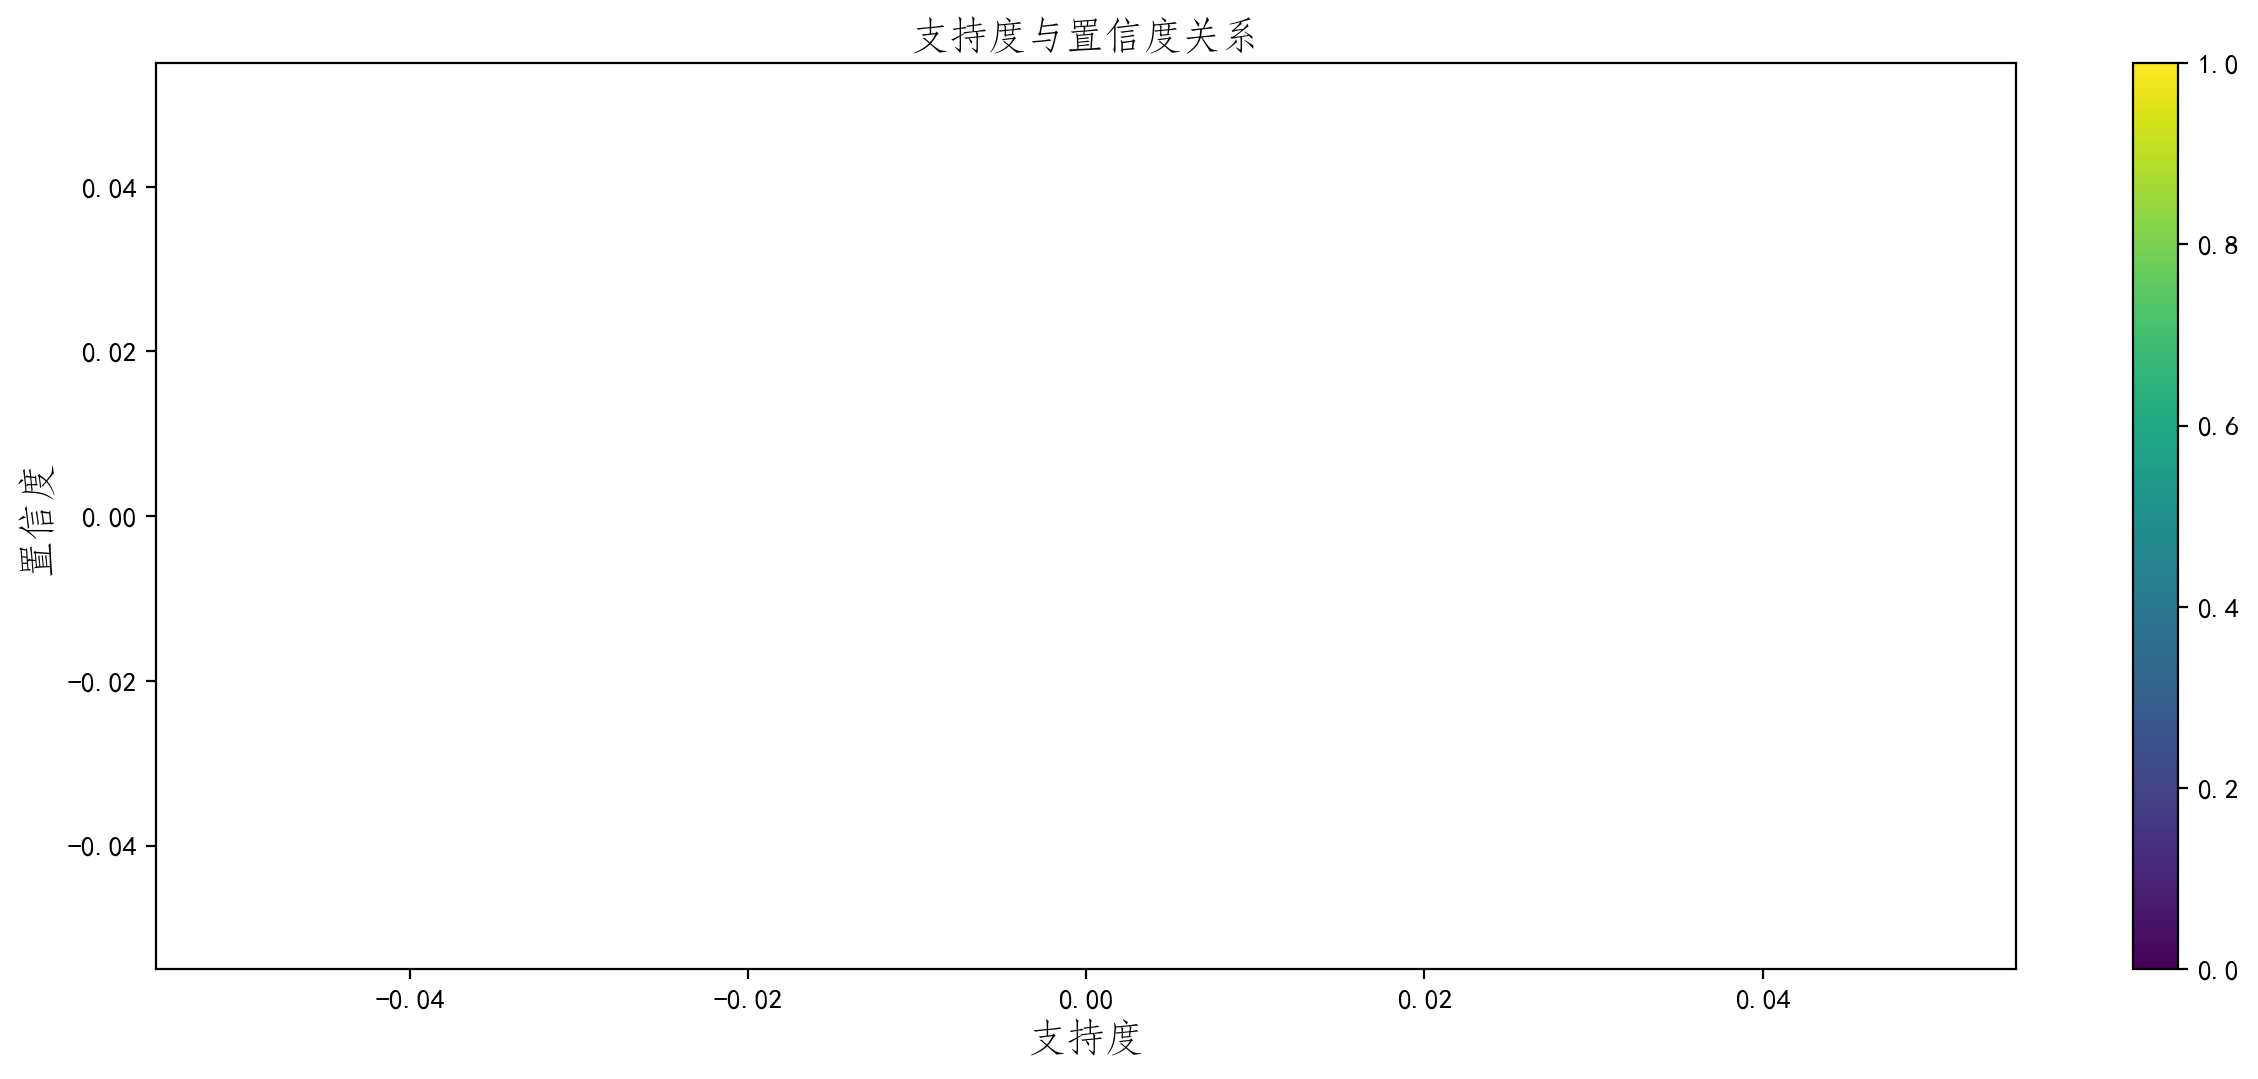

In [150]:
import random
# 设置图片大小，分辨率
plt.figure(figsize=(15, 6),dpi=200)
support=rules["support"]
confidence=rules["confidence"]
lift=rules['lift']
fonts = FontProperties(fname="word2evc/华文仿宋.ttf",size=14)
txt=[]
for i in range(support.shape[0]):
   txt.append(str(i))

# 给所有点在xy方向上设置一个随机的位移，让重合的点相互分开
support_random=[]
confidence_random=[]
for i in range (len(support)):
   support_random.append(support[i] + 0.002 * (random.randint(1,10)-5) )
   confidence_random.append(confidence[i] + 0.002 * (random.randint(1,10) -5))
 
plt.scatter(support_random, confidence_random,alpha=1,c=lift, marker="*",cmap="viridis")

for i in range(support.shape[0]):
   # 这里xy是需要标记的坐标，xytext是对应的标签坐标
   plt.annotate(txt[i], xy = (support_random[i], confidence_random[i]), xytext = (support_random[i]+0.0001, confidence_random[i]+0.0001)) 

plt.xlabel('支持度',fontproperties=fonts)
plt.ylabel('置信度',fontproperties=fonts)
plt.title('支持度与置信度关系',fontproperties=fonts)
plt.colorbar()
plt.show()

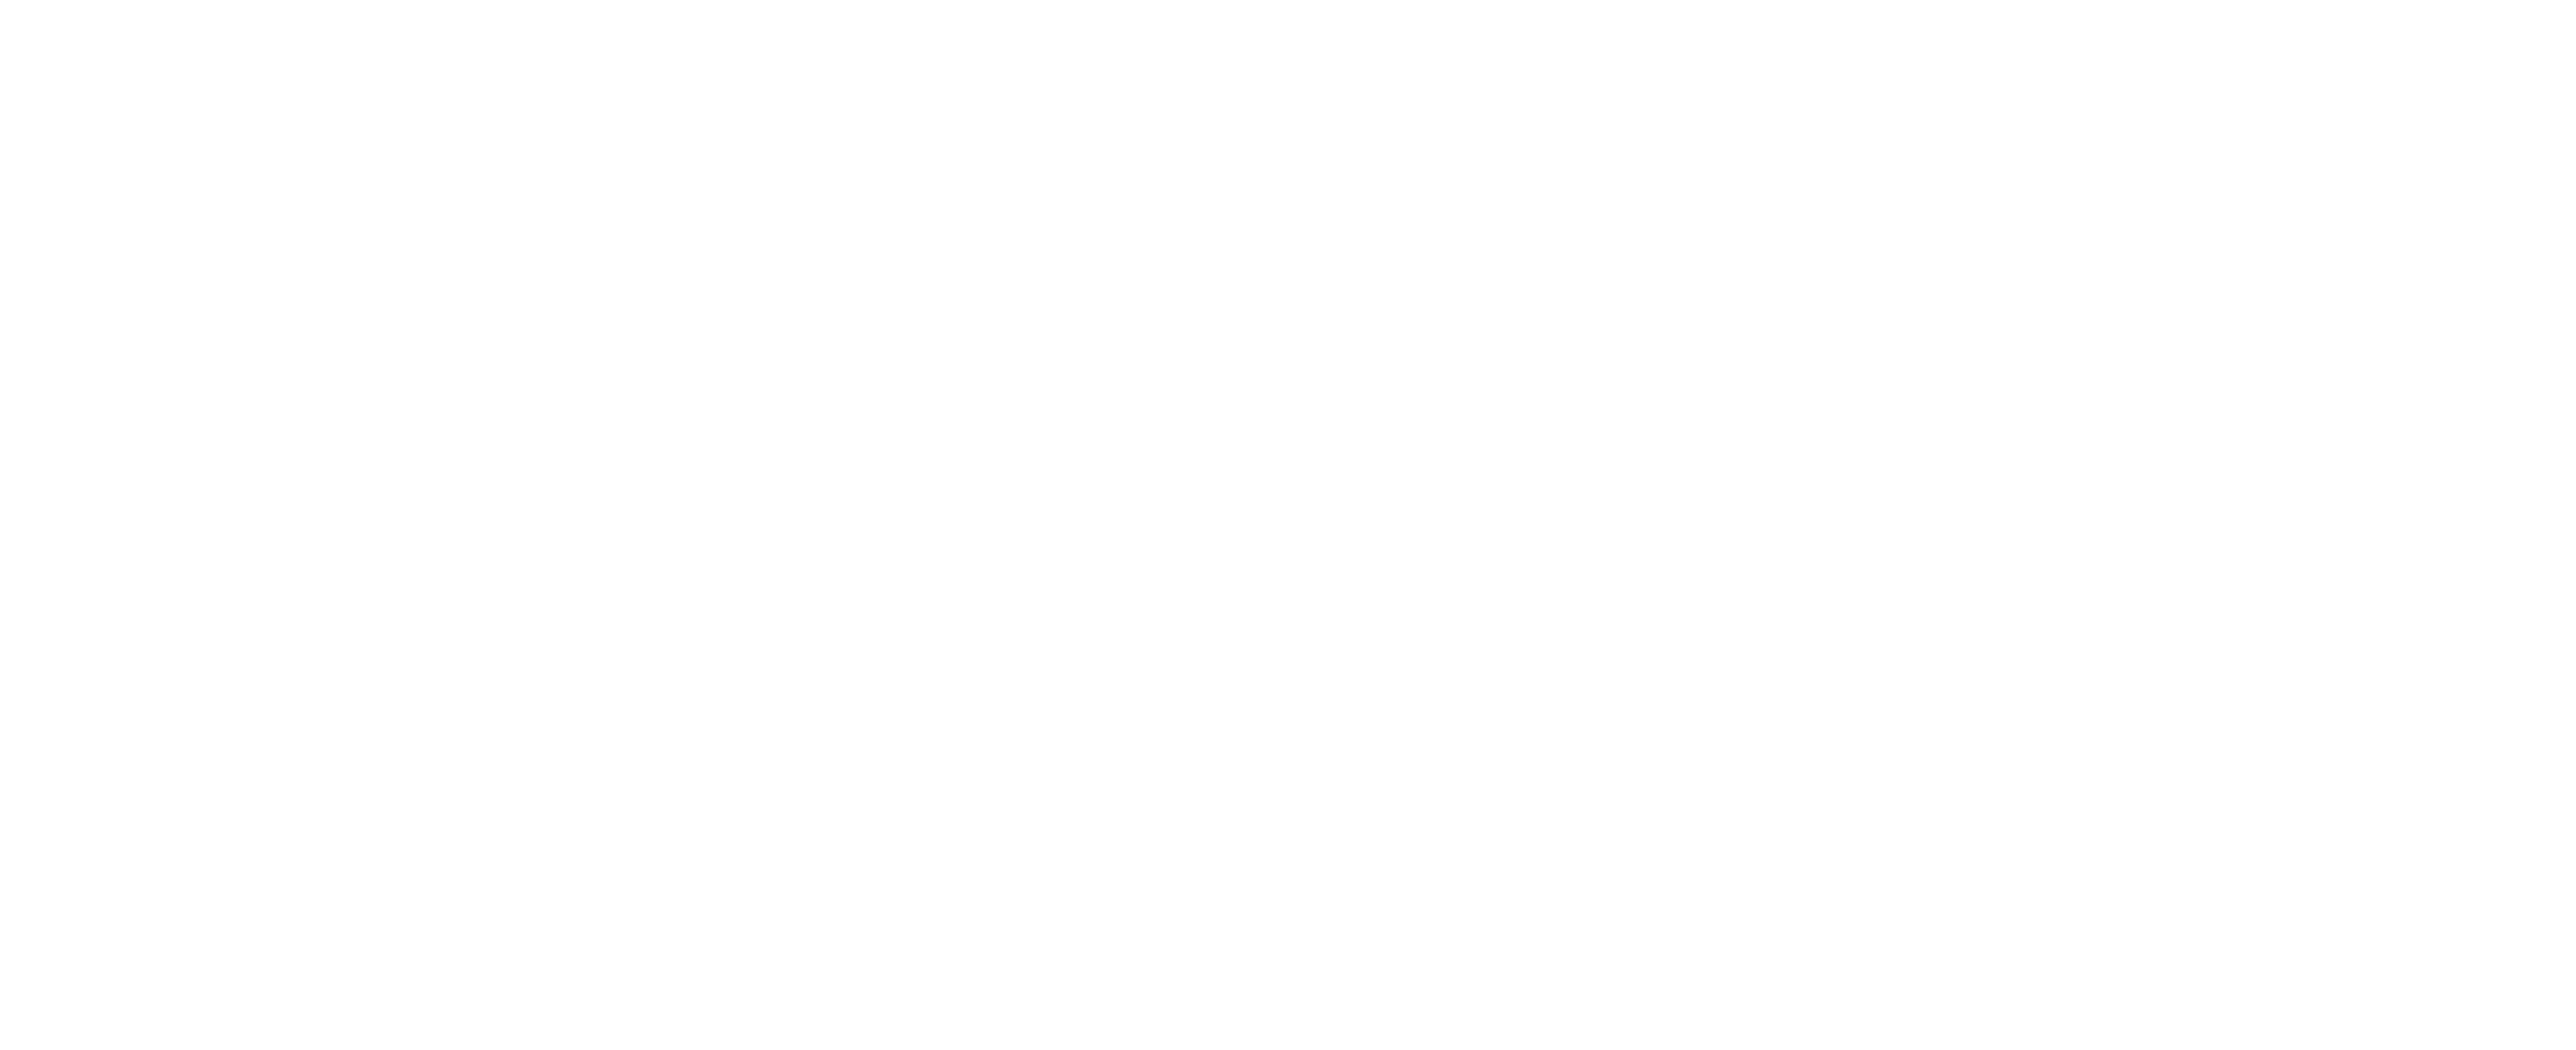

In [151]:
import numpy as np
 
def draw_graph(rules):
  plt.figure(figsize=(15, 6),dpi=200)
  G1 = nx.DiGraph()
   
  color_map=[]
  N = rules.shape[0]
  rules_to_show=N
  colors = np.random.rand(N)    
  strs=[ "R%d"%(i) for i in range(N)]   
   
   
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
    
    for a in rules.iloc[i]['antecedents']:
                
        G1.add_nodes_from([a],fontproperties = fonts)
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([c],fontproperties = fonts)
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')       
 
 
   
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1,k=N*10)
  nx.draw(G1, pos,  node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

  nx.draw_networkx
 
     
draw_graph (rules)   